In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

from scipy.signal import correlate

In [2]:
# Column headers
headers = ['Ensemble', 'Velocity x', 'Velocity y', 'Velocity z1', 'Velocity z2',
           'Amplitude x', 'Amplitude y', 'Amplitude z1', 'Amplitude z2',
           'SNR x', 'SNR y', 'SNR z1', 'SNR z2',
           'Correlation x', 'Correlation y', 'Correlation z1', 'Correlation z2']

# Using pandas to read the dat file and create a dataframe
df = pd.read_csv('5.6-80.dat', delim_whitespace=True, names=headers)

df

,Ensemble,Velocity x,Velocity y,Velocity z1,Velocity z2,Amplitude x,Amplitude y,Amplitude z1,Amplitude z2,SNR x,SNR y,SNR z1,SNR z2,Correlation x,Correlation y,Correlation z1,Correlation z2
72,100011,0.0088,-0.0027,0.0196,0.0205,53,52,59,55,12.9,13.5,14.6,12.5,97,97,98,95
73,100011,0.0003,-0.0008,0.0185,0.0191,47,42,64,55,11.9,11.6,15.3,12.5,97,93,98,96
74,100011,-0.0038,-0.0031,0.0184,0.0189,48,26,54,56,12.0,7.5,13.8,12.7,95,89,97,96
75,100011,-0.0017,-0.0022,0.0162,0.0149,41,35,37,42,10.7,10.1,10.5,10.2,95,82,92,92
76,100011,-0.0181,0.0009,0.0105,0.0135,27,19,29,43,7.0,4.7,8.4,10.4,82,78,91,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,100011,0.0201,-0.0059,0.0131,0.0150,37,49,43,54,9.8,13.0,11.8,12.4,89,95,94,93
4568,100011,0.0136,-0.0040,0.0153,0.0158,40,54,38,58,10.5,13.8,10.8,13.0,87,95,95,95
4569,100011,0.0156,-0.0037,0.0167,0.0183,27,35,20,37,7.0,10.1,5.2,9.1,85,94,86,91
4570,100011,0.0066,-0.0070,0.0204,0.0192,22,24,23,27,5.3,6.8,6.4,6.3,82,87,85,87


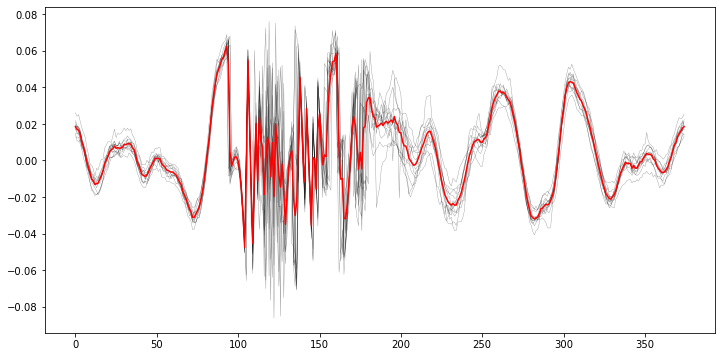

In [3]:
# Number of datapoints for each wave
# (length of the entire dataframe divided by twelve)
N = int(len(df) / 12)

fig = plt.figure(figsize = (12, 6))

# Create an array to hold the ensemble average
avg = np.zeros(N)

# Loop over 12 waves
for i in range(12):
    # Calculate the average
    avg += df['Velocity z1'].values[i*N:(i+1)*N] / 12
    # Plot the invidivual wave by slicing array
    plt.plot(df['Velocity z1'].values[i*N:(i+1)*N], lw = 0.4, alpha = 0.4, c = 'k')

# Plot ensemble average
plt.plot(avg, c = 'r')

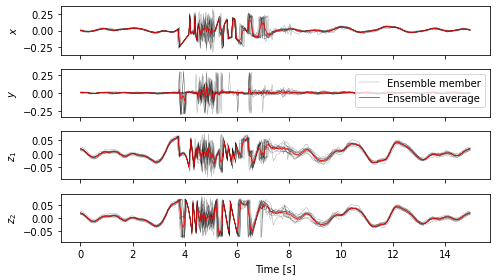

In [4]:
# Number of datapoints for each wave
# (length of the entire dataframe divided by twelve)
N = int(len(df) / 12)

fig, ax = plt.subplots(nrows=4, figsize = (7,4), sharex=True, facecolor='w')

# create an array to use as time dimension
# (25 samples per second)
t = np.arange(N)/25

# Loop over all four velocity components
for i, col in enumerate(['Velocity x', 'Velocity y', 'Velocity z1', 'Velocity z2']):
    # Create an array to hold average
    avg = np.zeros(N)
    # Loop over all 12 waves
    for n in range(12):
        # Calculate ensembel average for this component
        avg += df[col].values[n*N:(n+1)*N] / 12
        # Add label only for first ensemble member (otherwise there would be 12 identical labels)
        if n == 0:
            label = 'Ensemble member'
        else:
            label = ''
        # Plot single wave by slicing array
        ax[i].plot(t, df[col].values[n*N:(n+1)*N], lw = 0.4, alpha = 0.4, c = 'k', label = label)

    # Plot the ensemble average
    ax[i].plot(t, avg, c = 'r', lw = 0.75, label = 'Ensemble average')

# Add labels to the plot
ax[0].set_ylabel('$x$')
ax[1].set_ylabel('$y$')
ax[2].set_ylabel('$z_1$')
ax[3].set_ylabel('$z_2$')
ax[3].set_xlabel('Time [s]')

# Add legend in one subplot only (choosing the y-component)
ax[1].legend(loc = 'upper right')

# Adjust plot size and save
plt.tight_layout()
plt.savefig('ensemble_average.png', dpi = 240)